In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
import pandas as pd

In [67]:
df = pd.read_csv("/content/drive/MyDrive/potato_production.csv")

In [68]:
df.head(10)

,Year,Production (Tonnes),Seed (Tonnes),Area Harvested (Hectares),Yield (Tonnes/Hectare),Price (BDT/Tonne)
0,1980,1200000,60000,100000,12.00,5000
1,1981,1250000,62000,105000,11.90,5200
2,1982,1300000,65000,110000,11.82,5400
3,1983,1350000,68000,115000,11.74,5600
4,1984,1400000,70000,120000,11.67,5800
5,1985,1450000,72000,125000,11.60,6000
6,1986,1500000,74000,130000,11.53,6200
7,1987,1550000,76000,135000,11.46,6400
8,1988,1600000,78000,140000,11.39,6600
9,1989,1650000,80000,145000,11.32,6800


In [69]:
df.describe()

,Year,Production (Tonnes),Seed (Tonnes),Area Harvested (Hectares),Yield (Tonnes/Hectare),Price (BDT/Tonne)
count,45.000000,4.500000e+01,45.000000,45.000000,45.000000,45.000000
mean,2002.000000,2.896667e+06,105888.888889,261666.666667,10.315778,9400.000000
std,13.133926,1.293577e+06,26454.267762,116067.182740,1.018498,2626.785107
min,1980.000000,1.200000e+06,60000.000000,100000.000000,8.580000,5000.000000
25%,1991.000000,1.750000e+06,84000.000000,155000.000000,9.460000,7200.000000
50%,2002.000000,2.700000e+06,106000.000000,250000.000000,10.340000,9400.000000
75%,2013.000000,3.800000e+06,128000.000000,360000.000000,11.180000,11600.000000
max,2024.000000,5.600000e+06,150000.000000,470000.000000,12.000000,13800.000000


# Production over the years

In [70]:
import matplotlib.pyplot as plt

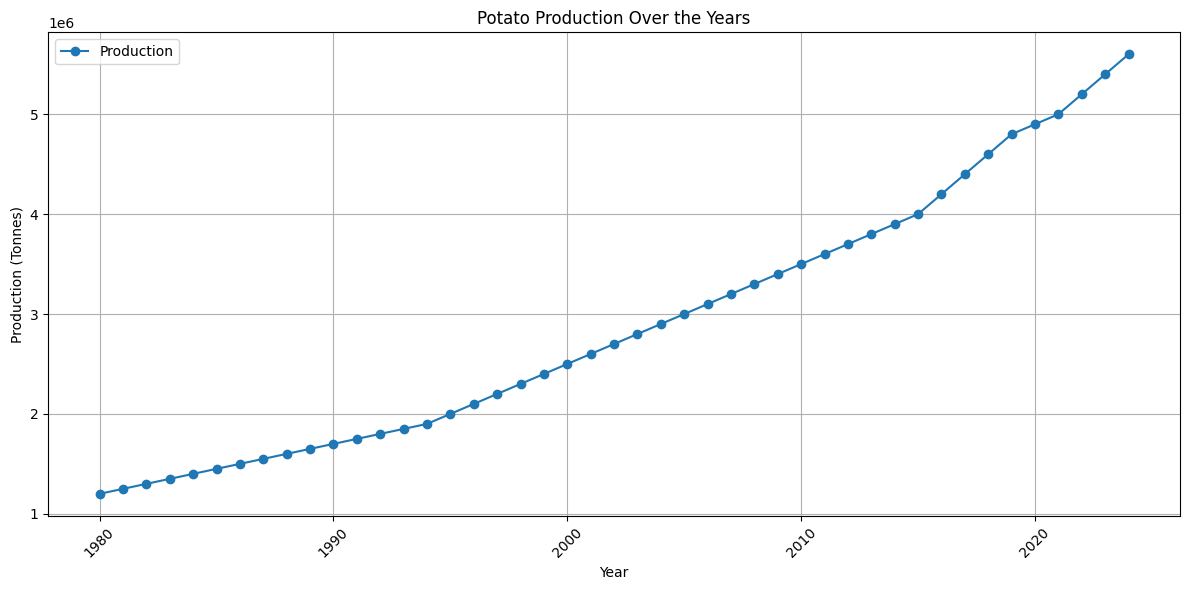

In [71]:
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Production (Tonnes)'], marker='o', label='Production')
plt.title('Potato Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Production (Tonnes)')
plt.grid()
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Yield over the years

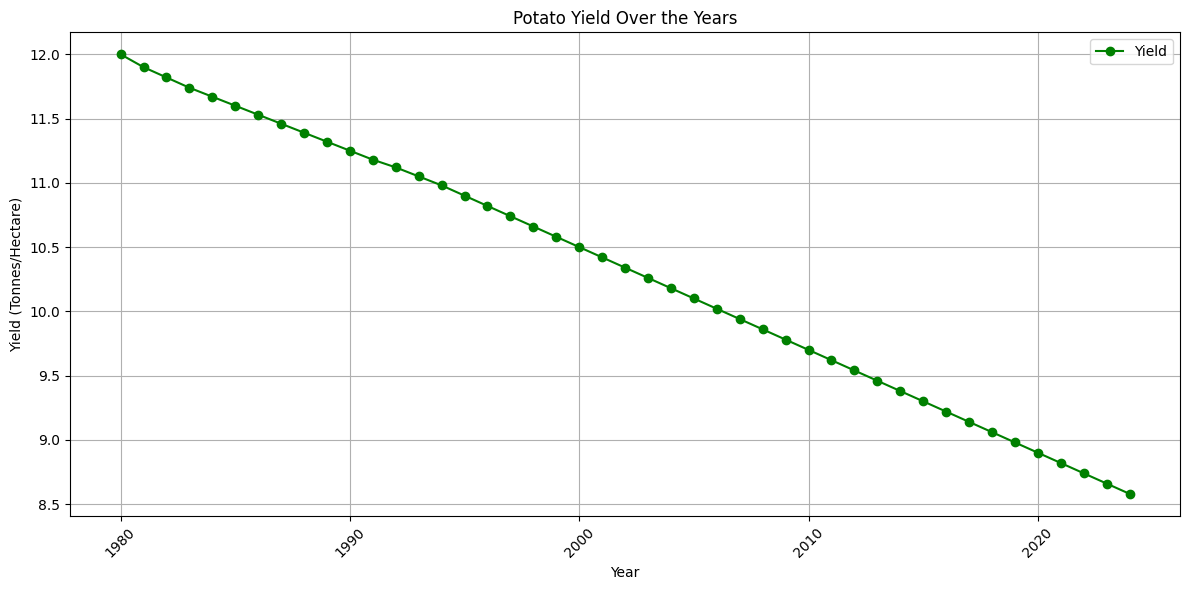

In [72]:
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Yield (Tonnes/Hectare)'], marker='o', color='green', label='Yield')
plt.title('Potato Yield Over the Years')
plt.xlabel('Year')
plt.ylabel('Yield (Tonnes/Hectare)')
plt.grid()
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Price over the years

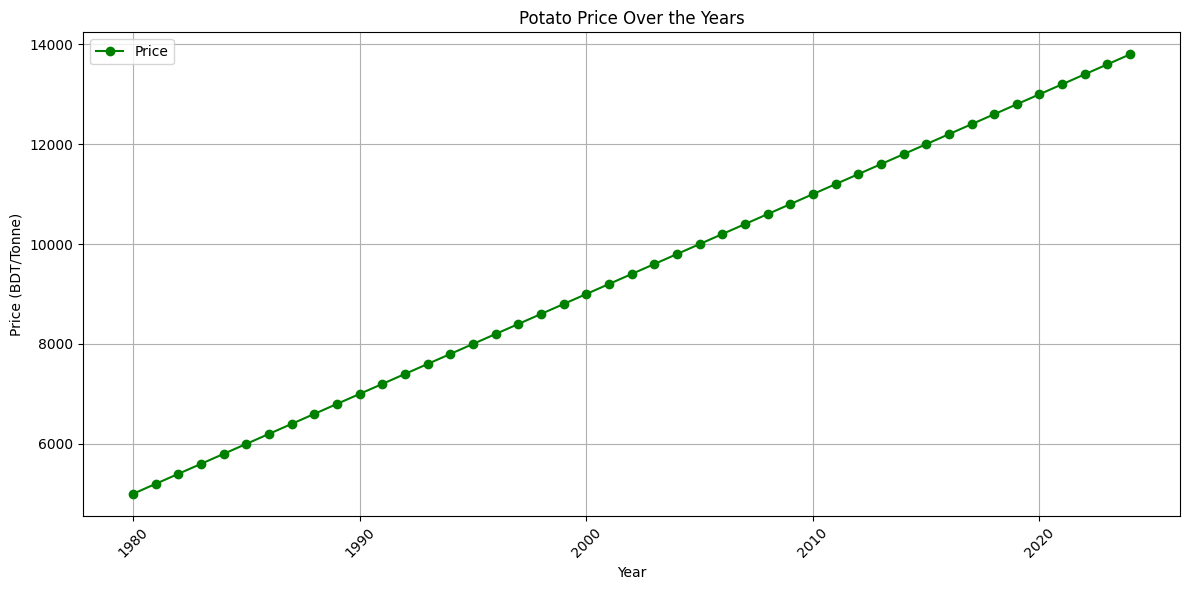

In [73]:
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Price (BDT/Tonne)'], marker='o', color='green', label='Price')
plt.title('Potato Price Over the Years')
plt.xlabel('Year')
plt.ylabel('Price (BDT/Tonne)')
plt.grid()
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Correlation analysis

In [74]:
correlation_matrix = df.corr()

In [75]:
correlation_matrix

,Year,Production (Tonnes),Seed (Tonnes),Area Harvested (Hectares),Yield (Tonnes/Hectare),Price (BDT/Tonne)
Year,1.000000,0.983281,0.999887,0.993300,-0.999673,1.000000
Production (Tonnes),0.983281,1.000000,0.981853,0.995044,-0.986940,0.983281
Seed (Tonnes),0.999887,0.981853,1.000000,0.992136,-0.999411,0.999887
Area Harvested (Hectares),0.993300,0.995044,0.992136,1.000000,-0.995810,0.993300
Yield (Tonnes/Hectare),-0.999673,-0.986940,-0.999411,-0.995810,1.000000,-0.999673
Price (BDT/Tonne),1.000000,0.983281,0.999887,0.993300,-0.999673,1.000000


# Prediction

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [77]:
# Features and target variable
drop_val = df.drop(['Price (BDT/Tonne)', 'Year'], axis=1)  # Exclude the target and Year
y= df['Price (BDT/Tonne)']
X = df[['Year']]

In [78]:
X.head(2)

,Year
0,1980
1,1981


In [79]:
y.head(2)

,Price (BDT/Tonne)
0,5000
1,5200


In [80]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [81]:
# Models to train
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=100),
    "Random Forest": RandomForestRegressor(random_state=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=100),
    "Support Vector Regressor": SVR()
}

In [92]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2 Score": r2_score(y_test, y_pred)
    }

In [93]:
results_df = pd.DataFrame(results).T

In [94]:
results_df

,MAE,MSE,R2 Score
Linear Regression,5.820766e-11,3.388132e-21,1.000000
Decision Tree,2.000000e+02,4.000000e+04,0.993506
Random Forest,1.311111e+02,2.458756e+04,0.996009
Gradient Boosting,2.000347e+02,4.001391e+04,0.993504
Support Vector Regressor,2.091000e+03,6.249786e+06,-0.014576


In [110]:
predictions_2025 = {}

future_year = pd.DataFrame([[2025]], columns=['Year'])
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Fit the model
    predicted_price = model.predict(future_year)
    predictions_2025[model_name] = predicted_price

In [111]:
for model_name, prediction in predictions_2025.items():
    print(f"{model_name} Prediction for 2025: {prediction}")

Linear Regression Prediction for 2025: [14000.]
Decision Tree Prediction for 2025: [13600.]
Random Forest Prediction for 2025: [13472.]
Gradient Boosting Prediction for 2025: [13599.77153606]
Support Vector Regressor Prediction for 2025: [9309.05503877]


In [112]:
df.tail(1)

,Year,Production (Tonnes),Seed (Tonnes),Area Harvested (Hectares),Yield (Tonnes/Hectare),Price (BDT/Tonne)
44,2024,5600000,150000,470000,8.58,13800
